In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [41]:
from google.colab import files
uploaded = files.upload()

In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train_E6oV3lV.csv']))

KeyError: ignored

In [0]:
df = pd.read_csv('train_E6oV3lV.csv')

FileNotFoundError: ignored

In [0]:
df.head()

In [0]:
df.groupby('label').count()

In [0]:
count_class_0, count_class_1 = df['label'].value_counts()

In [0]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [0]:
df_under.shape

In [0]:
df_under.groupby('label').count()

In [0]:
X = df_under['tweet']
Y = df_under['label']
Y_org = Y

In [0]:
X[34]

In [0]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [43]:
max(df['tweet'], key=len)

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 95)
pca.fit(X)
X = pca.transform(X);

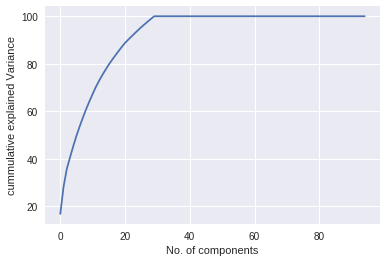

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [0]:
from keras.models import Sequential 

In [0]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [0]:
classifier = Sequential()
classifier.add(LSTM(units=40, activation='relu',return_sequences= True, input_shape=(None, 95)))
classifier.add(Dropout(rate=0.3))

In [0]:
classifier.add(LSTM(units=20, return_sequences= True,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(LSTM(units=20,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units = 2, activation='sigmoid'))

In [0]:
classifier.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')

In [53]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [54]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0],1 ,X_test.shape[1]))
import tensorflow as tf
with tf.device('/gpu:0'):
    checker = classifier.fit(X_train_lstm, Y_train, batch_size=32, epochs=200, validation_data = (X_test_lstm, Y_test))


Train on 3587 samples, validate on 897 samples
Epoch 1/200
3587/3587 [==============================] - 4s 1ms/step - loss: 0.6923 - acc: 0.5562 - val_loss: 0.6902 - val_acc: 0.6533
Epoch 2/200
3587/3587 [==============================] - 1s 222us/step - loss: 0.6826 - acc: 0.6500 - val_loss: 0.6815 - val_acc: 0.6722
Epoch 3/200
3587/3587 [==============================] - 1s 224us/step - loss: 0.6751 - acc: 0.6682 - val_loss: 0.6752 - val_acc: 0.6800
Epoch 4/200
3587/3587 [==============================] - 1s 234us/step - loss: 0.6555 - acc: 0.6769 - val_loss: 0.6636 - val_acc: 0.6795
Epoch 5/200
3587/3587 [==============================] - 1s 232us/step - loss: 0.6383 - acc: 0.6833 - val_loss: 0.6480 - val_acc: 0.6884
Epoch 6/200
3587/3587 [==============================] - 1s 228us/step - loss: 0.6275 - acc: 0.6853 - val_loss: 0.6264 - val_acc: 0.7023
Epoch 7/200
3587/3587 [==============================] - 1s 234us/step - loss: 0.6126 - acc: 0.6931 - val_loss: 0.6150 - val_acc: 0.7

In [0]:
Y_pred_test_label = classifier.predict(X_test_lstm)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train_lstm)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       443
           1       0.73      0.79      0.76       454

   micro avg       0.74      0.74      0.74       897
   macro avg       0.75      0.74      0.74       897
weighted avg       0.75      0.74      0.74       897



In [0]:
from sklearn.metrics import confusion_matrix

In [66]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1395  160]
 [ 404 1628]]

Test:  
 [[310  96]
 [133 358]]


In [67]:
print(classification_report(Y_train_true,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1799
           1       0.80      0.91      0.85      1788

   micro avg       0.84      0.84      0.84      3587
   macro avg       0.85      0.84      0.84      3587
weighted avg       0.85      0.84      0.84      3587



In [0]:
classifier.save("rnn_classifier.h5")

In [0]:
from keras.models import load_model
new_model = load_model("rnn_classifier.h5")

In [72]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 40)          21760     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 40)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 20)          4880      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 20)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total para

In [73]:
new_model.get_weights()

[array([[ 1.26522658e-02, -1.45466877e-02,  5.32281734e-02, ...,
          1.94309264e-01,  1.73231259e-01,  1.97624599e-04],
        [ 1.72596708e-01,  3.61912549e-01, -1.56815454e-01, ...,
         -1.52456895e-01, -2.23304018e-01, -8.94366950e-02],
        [-3.51972759e-01,  1.42514795e-01, -6.63460866e-02, ...,
         -2.25700513e-01,  1.13745153e-01, -4.46361512e-01],
        ...,
        [-1.17162585e-01,  1.50364965e-01,  1.16100907e-01, ...,
          1.03792459e-01, -3.79721448e-02,  1.18878633e-01],
        [-1.50815308e-01, -3.23526040e-02,  4.69220579e-02, ...,
         -3.83230522e-02,  5.05429506e-03,  1.05341494e-01],
        [-7.68706948e-02,  1.54663324e-02, -5.09368256e-02, ...,
          1.02868140e-01,  7.49372542e-02,  1.30157769e-01]], dtype=float32),
 array([[-0.20377603, -0.01456034,  0.19023797, ..., -0.05616831,
          0.05310729,  0.04685752],
        [-0.05206563, -0.05932875,  0.00851739, ...,  0.04992067,
         -0.08263762,  0.02963865],
        [-

In [74]:
new_model.optimizer

In [75]:
new_model.predict(X_train_lstm)

array([[0.8850626 , 0.11416557],
       [0.50840765, 0.49298397],
       [0.80122423, 0.1986976 ],
       ...,
       [0.13003074, 0.86986136],
       [0.19666998, 0.80330724],
       [0.3151698 , 0.6849288 ]], dtype=float32)